# Decision Trees

**Import the Iris Dataset using Pandas csv**

- pd.read_csv("Irirs.csv")

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV    
#Convert to Dataframe
data = pd.read_csv("IRIS.csv")

data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Understanding

1. id column - the datasets index column

2. Sepal length (cm): This column represents the length of the sepal (the leaf-like structure) of the iris flower in centimeters. It is a continuous numerical variable and likely has a positive range.

3. Sepal width (cm): Similar to sepal length, this column represents the width of the sepal in centimeters. It is also a continuous numerical variable and likely has a positive range.

4. Petal length (cm): This column represents the length of the petal of the iris flower in centimeters. It is a continuous numerical variable and likely has a positive range.

5. Petal width (cm): Similar to petal length, this column represents the width of the petal in centimeters. It is also a continuous numerical variable and likely has a positive range.

6. Species - This column represents the different types of flowers.


# Data Analysis

- Standardaize the species column by dropping the Iris- string




In [2]:
data['species'] = data['species'].str.replace("Iris-","")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**The dataset has 0 null values**


# Explaratory Data Analysis

- In this EDA the following data visuliaztions will be used:
    
    1. Pairplot - Shows the distribution of single variables
                - Shows relationships of 2 variables
                - The target variable will be represented using the hue

    2. Heatmap - Show the correaltion between the target variable and the features            

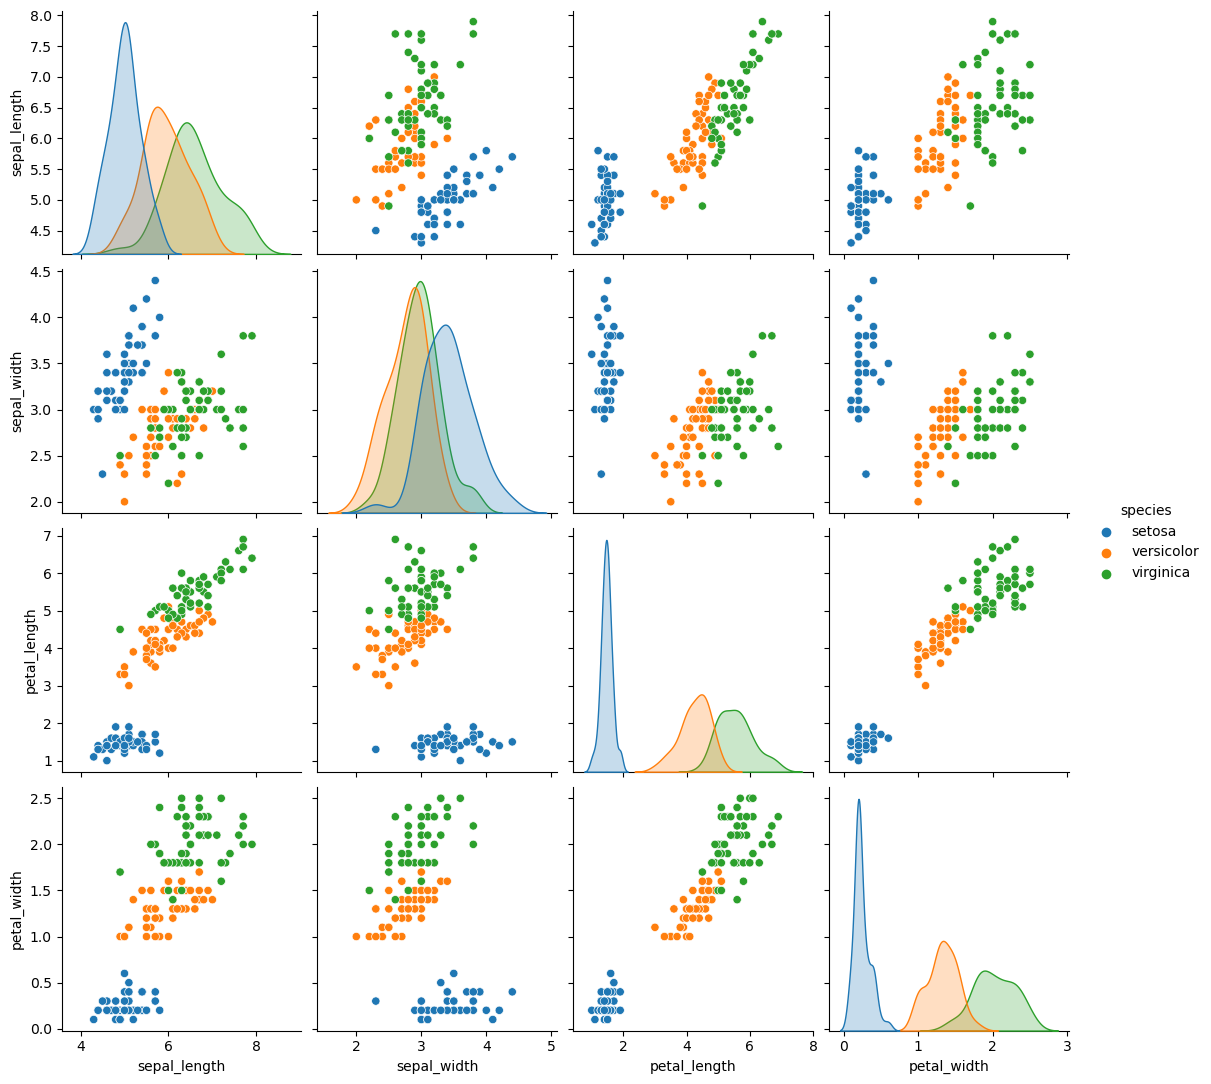

In [4]:
sns.pairplot(data, hue='species', height=2.75)

# Inference From Graph

1. Sepal Length vs. Sepal Width: There seems to be a weak positive correlation between Sepal Length and Sepal Width, meaning that flowers with longer 

2. sepals tend to also have wider sepals. However, there is significant overlap in the distributions of these features across the three Iris species.

3. Sepal Length vs. Petal Length: There is a weak positive correlation between Sepal Length and Petal Length, similar to the relationship between Sepal Length and Sepal Width.

4. Sepal Length vs. Petal Width: The relationship between Sepal Length and Petal Width is even weaker than the previous two, with no clear trend visible.

5. Sepal Width vs. Petal Length: There appears to be a weak positive correlation between Sepal Width and Petal Length, similar to the other pairwise relationships involving Sepal Length.

6. Sepal Width vs. Petal Width: The relationship between Sepal Width and Petal Width is weak, with some overlap in the distributions across the three species.

7. Petal Length vs. Petal Width: There is a weak positive correlation between Petal Length and Petal Width.
Species Separation:

While the individual pairwise plots show weak correlations, we can see some separation between the Iris species when considering all features together, particularly in the plots involving Petal Length and Petal Width. For example:

Sepal Length and Sepal Width: Although there is overlap, Setosa tends to have smaller Sepal Length and Width compared to the other two species.

Petal Length and Petal Width: Versicolor and Virginica tend to have larger Petal Length and Width compared to Setosa.


**Note: if there are 2 highly correlatated variables, then drop one variable**

# Correlation Analysis

- The correalation matrix only accpets numerical data not categorical data. Therefore, equiate the "species" column to a numeric value
    1. for example setosa = 1 , versicolor = 2 , virginica = 3




In [5]:
data_copy = data.copy()
data_copy['species_numeric'] = data_copy['species']

data_copy['species_numeric'] = data_copy['species_numeric'].str.replace('setosa','1')
data_copy['species_numeric'] = data_copy['species_numeric'].str.replace('versicolor','2')
data_copy['species_numeric'] = data_copy['species_numeric'].str.replace('virginica','3')

data_copy.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_numeric
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [6]:
#Convert the new species column to numeric value
data_copy['species_numeric'] = pd.to_numeric(data_copy['species_numeric'],downcast='integer')
#Check if the column is in int 
data_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length     150 non-null    float64
 1   sepal_width      150 non-null    float64
 2   petal_length     150 non-null    float64
 3   petal_width      150 non-null    float64
 4   species          150 non-null    object 
 5   species_numeric  150 non-null    int8   
dtypes: float64(4), int8(1), object(1)
memory usage: 6.1+ KB


In [7]:
#Create a copy of the data frame inorder to freely modify it

#Drop the species column due to the fact correaltion analysis wont run on categorical values
data_copy.drop(['species'],axis=1,inplace=True)
data_copy.head()

,sepal_length,sepal_width,petal_length,petal_width,species_numeric
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [8]:
#Reorder the column, making species the first column
new_order = ["species_numeric",'sepal_length', 'sepal_width', 'petal_length', 'petal_width']

data_copy = data_copy.reindex(columns=new_order)

data_copy.head()

,species_numeric,sepal_length,sepal_width,petal_length,petal_width
0,1,5.1,3.5,1.4,0.2
1,1,4.9,3.0,1.4,0.2
2,1,4.7,3.2,1.3,0.2
3,1,4.6,3.1,1.5,0.2
4,1,5.0,3.6,1.4,0.2


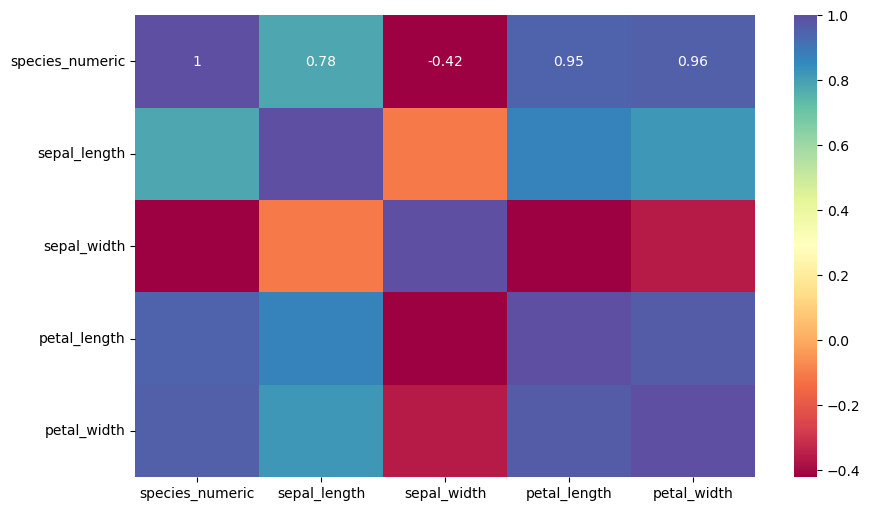

In [9]:
# Create the Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data_copy.corr(),annot=True,cmap='Spectral')
plt.show()

# Inference from the correlation matrix.

- Both petal_length and petal_width have high correlations to the tagaret variable. Inorder to aviod overfitting drop the second highest variable which is petal_length

In [10]:
data.drop(['petal_length'],axis=1,inplace=True)
data.head()

,sepal_length,sepal_width,petal_width,species
0,5.1,3.5,0.2,setosa
1,4.9,3.0,0.2,setosa
2,4.7,3.2,0.2,setosa
3,4.6,3.1,0.2,setosa
4,5.0,3.6,0.2,setosa


# Decision Tree Modelling


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
#Divide the dataset

X = data.drop(['species'],axis=1)

y = data['species']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

**Importing the decision tree algorithim**

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier() 
dt_model

DecisionTreeClassifier()

**Train the X and y variables**

In [14]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

**Predict using the X_test variable**

In [15]:
y_pred = dt_model.predict(X_test)

# Evaluation Metrics

- The following are nessecary evaluation metrics:

    1. classification_report

    2. confusion_matrix

    3. accuracy_score

In [16]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [17]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.9736842105263158


**97.3684% is very high and must be verified. Use the Cross Validation Algorithum**

# Cross Validation

**Import the Cross Validation libray**

In [18]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(estimator=dt_model,X=X_train,y=y_train,cv=10)

print("Cross Validation Score :",cv_scores.mean())

Cross Validation Score : 0.8734848484848484


**The difference between the Accuracy Score (0.9737) and the Cross-Validation Score (0.8735) indicates a potential overfitting issue in the machine learning model.**

# Confusion Matrix

In [19]:
print(confusion_matrix(y_test,y_pred))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


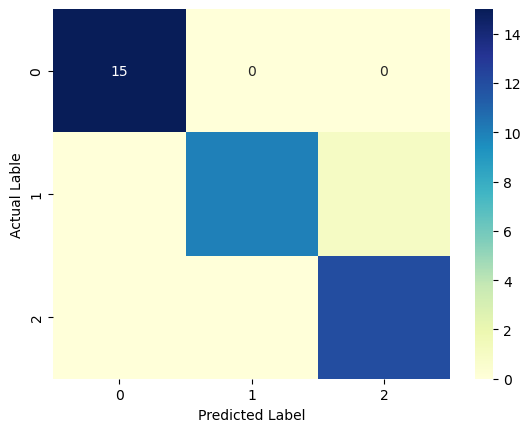

In [20]:
#Create a visual of the Confusion Matrix using a heatmap
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(cnf_matrix,annot=True,cmap='YlGnBu')
plt.ylabel("Actual Lable")
plt.xlabel("Predicted Label")

plt.show()

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



# Inferences from the Iris classification report:

**Overall performance:**

The model achieved a high accuracy of 97%, indicating it correctly classified most of the Iris flower samples.
The weighted average for precision, recall, and F1-score is also 0.97, highlighting consistent performance across all classes.

**Performance per class:**

Setosa: Achieved perfect precision, recall, and F1-score (1.00), meaning the model classified all Setosa flowers correctly and didn't confuse them with other species.

Versicolor: Performed well with precision (1.00), indicating all predicted Versicolor flowers were indeed Versicolor. However, there was a 9% misclassification rate (100% - 91% recall) where some other species were wrongly classified as Versicolor.

Virginica: Had high recall (1.00), meaning the model identified all true Virginica flowers correctly. However, there was an 8% misclassification rate (100% - 92% precision) where some Virginica flowers were classified as other species.

# Decision Tree Visulization

**Import the tree algortithm from sklearn**

-  from sklearn import tree

In [35]:
from sklearn import tree
# Create a list of the columns minus the speices target variable
features = list(data.columns[:-1])
#Get the target variables
targets = ['setosa','verisicolor','virginica']

**Plot the Data**

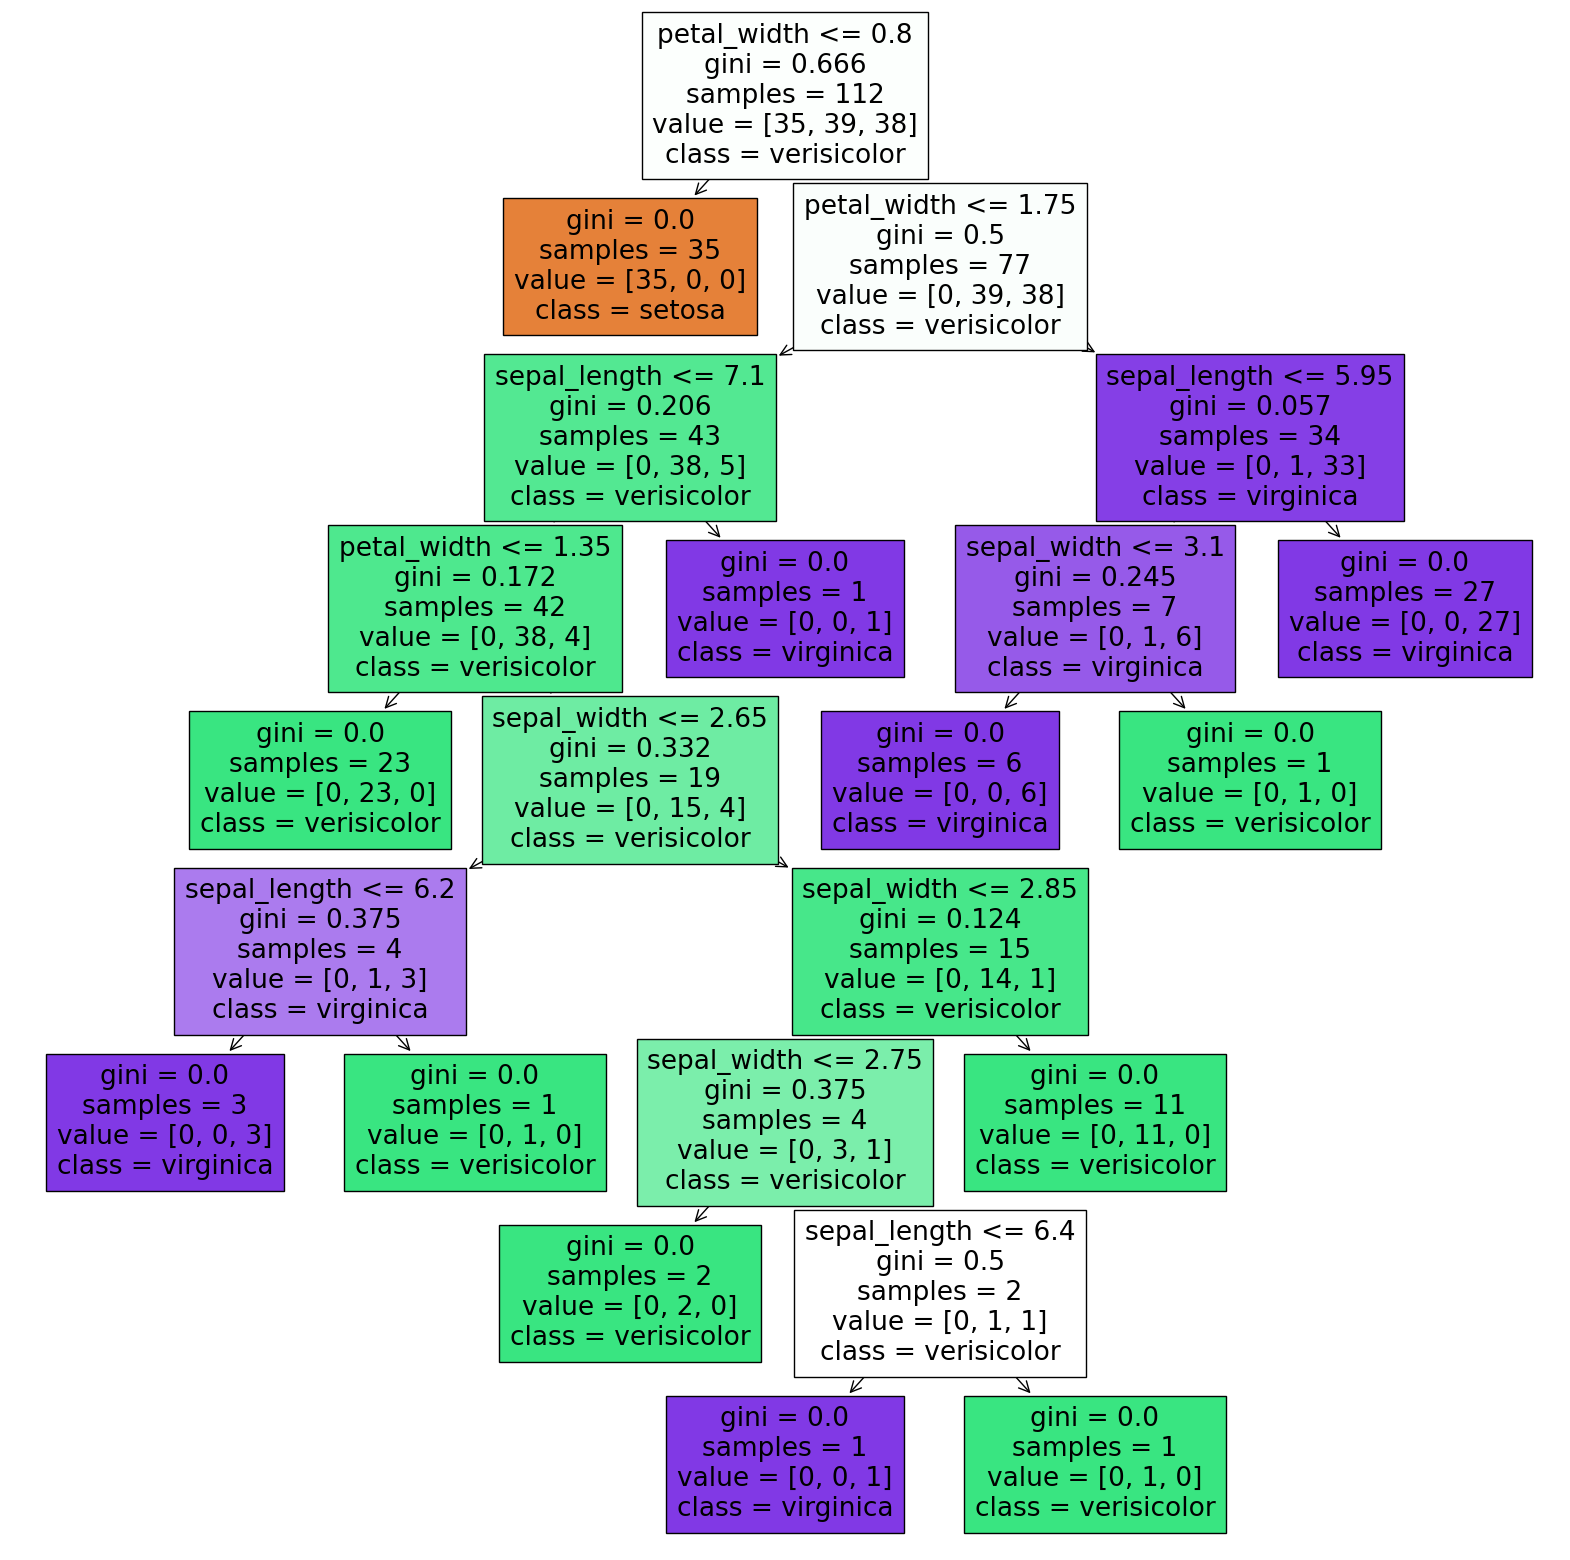

In [23]:
plt.figure(figsize=(20,20))
tree = tree.plot_tree(dt_model,filled=True, feature_names=features,class_names=targets)

# Hyperparameter Optimization

- Use the GridSearch CV to find the best hyperparameters.

In [24]:
dt_model2 = DecisionTreeClassifier()

**Create parameters variables**

In [25]:
dt_params = {'criterion':['gini','entropy'],
             "max_depth": np.arange(2,14,2),
             "max_features":["auto","sqrt","log2"]}

**Create a new CV model**

In [26]:
dt_cv_model = GridSearchCV(estimator=dt_model2,param_grid=dt_params,cv=10)

**Fit the X_train and y_train data**

In [27]:
dt_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  4,  6,  8, 10, 12]),
                         'max_features': ['auto', 'sqrt', 'log2']})

**Use the .best_params method to find the best hyperparameters**

In [28]:
dt_cv_model.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto'}

**The fine tunned model's hyperparameters will be as follows:**

    {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2'}

**Create a new Tunned variable with the correct hyperparameters**    

In [29]:
dt_tunned = DecisionTreeClassifier(criterion="gini",max_depth=6,max_features='log2')

**Fit X_train and y_train**

In [30]:
dt_tunned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features='log2')

**Predict the X_test**

In [31]:
y_pred = dt_tunned.predict(X_test)

# Tunned Model Evaluation

- Use the same evaluation metrics as before

In [32]:
#Accuarcy Score
print(accuracy_score(y_test,y_pred))

1.0


**Conduct a Cross Validation Test**

In [33]:
cv_scores1 = cross_val_score(estimator=dt_tunned,X=X_train,y=y_train,cv=10)

print("Cross Validation of Tunned Model:", cv_scores1.mean())

Cross Validation of Tunned Model: 0.8022727272727274


**The score has improved**

# Revisualize the Decision Tree

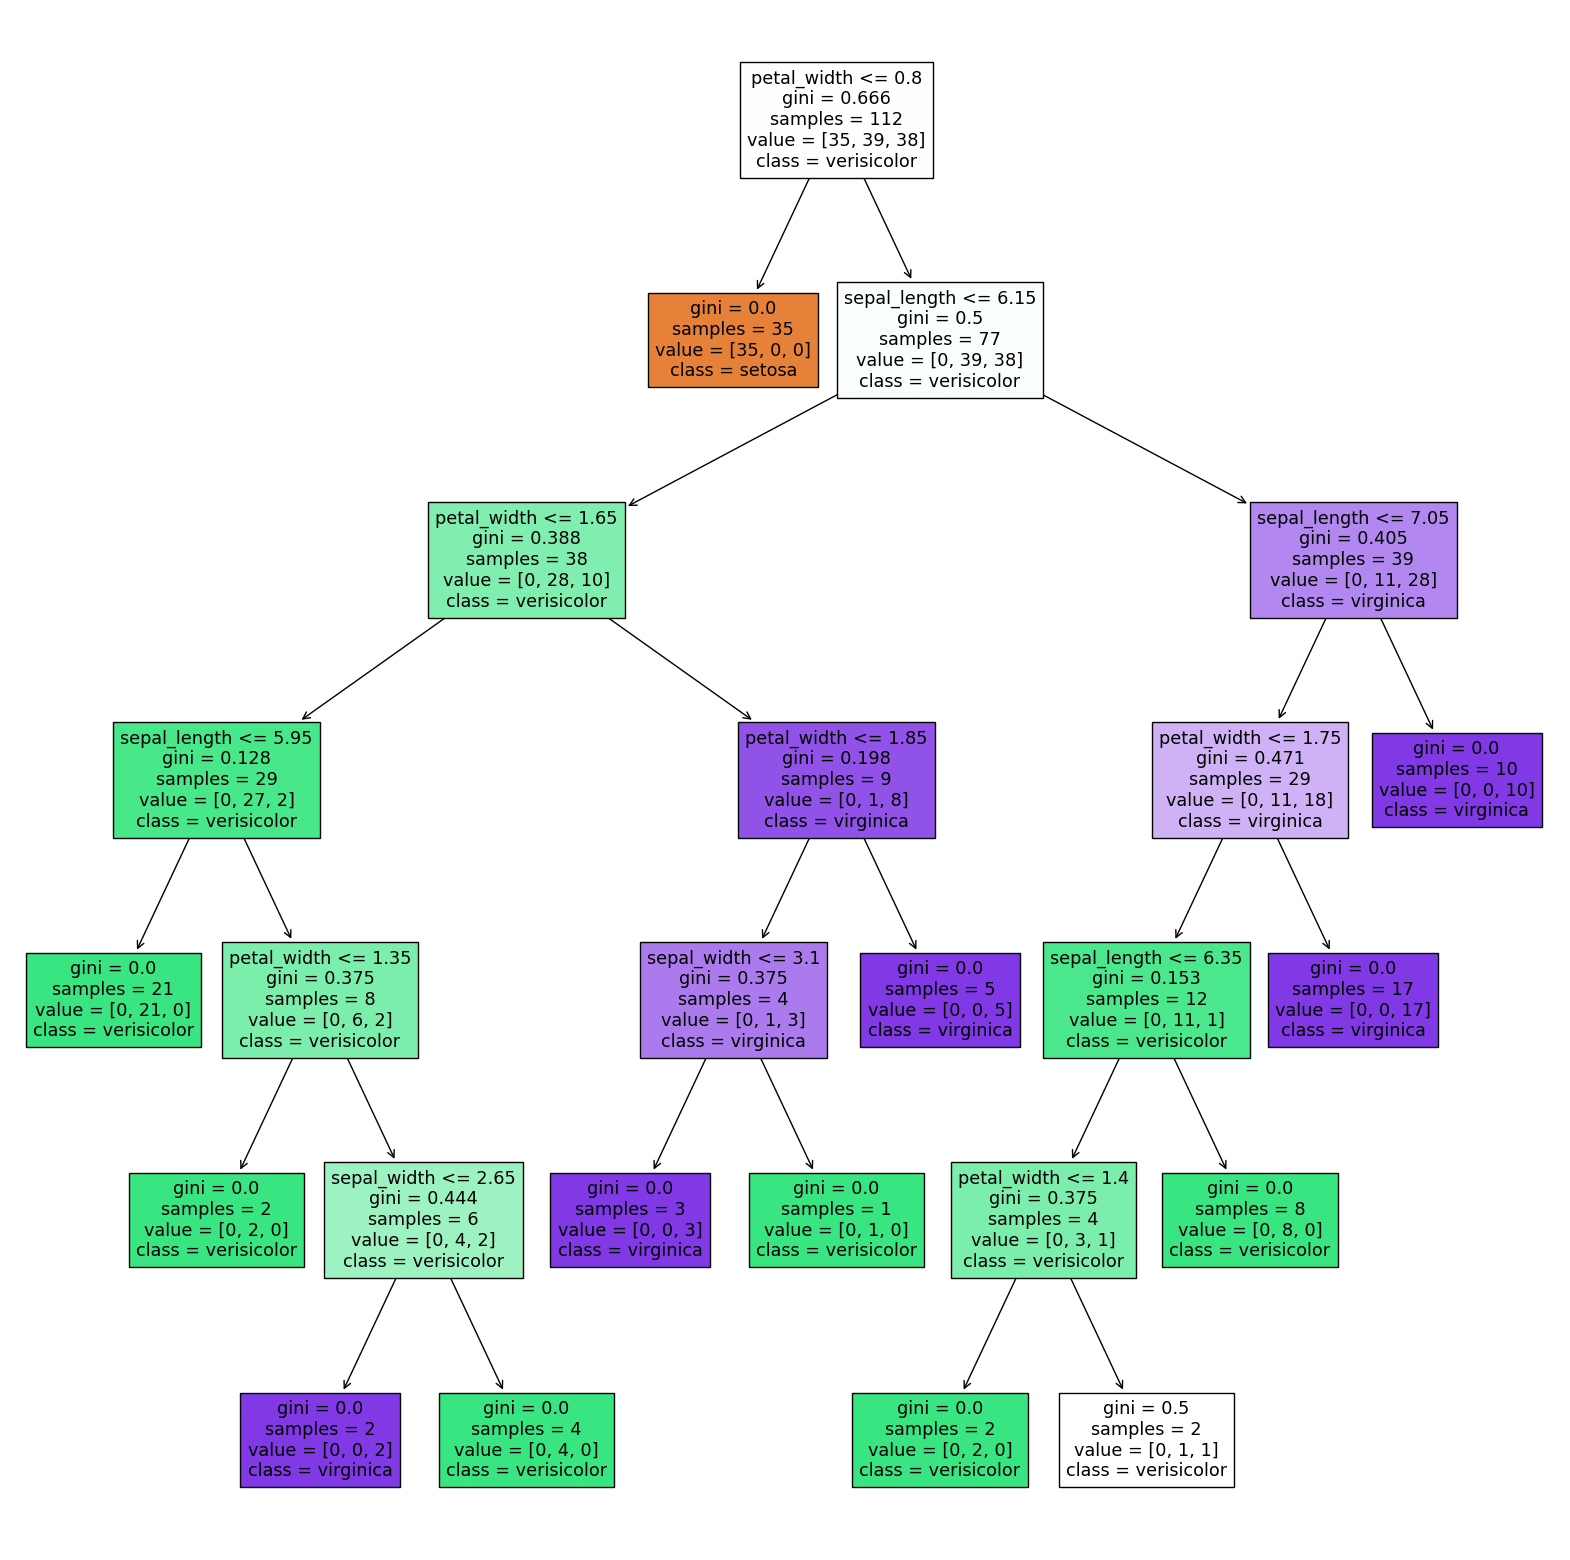

In [36]:
plt.figure(figsize=(20,20))
tree2 = tree.plot_tree(dt_tunned,filled=True, feature_names=features,class_names=targets)

# Inference from the Decision Tree

Root Node: The tree starts with the entire dataset (150 samples) at the top node.

Splits: At each node, the tree splits the data based on a decision rule using one of the features. The rule is chosen to maximize the separation between the different flower classes. For example, the root node splits the data based on whether the sepal length is less than or equal to 5.45.

Branches: Each split results in two branches, representing the possible outcomes of the decision.

Leaf Nodes: Branches reach leaf nodes when there's no further need to split, and the node contains samples belonging to a single class. The label on the leaf node indicates the predicted class (e.g., "Setosa").

Following the decision tree from the root:

Sepal length:
If sepal length <= 5.45: This branch leads to further splits based on sepal width and petal width, ultimately classifying samples as Setosa or Versicolor.
If sepal length > 5.45: This branch further splits based on petal length and sepal width, ultimately classifying samples as Versicolor or Virginica.

# Random Forest Algorithm

- The Random Forest Algorithm aims to increase the classification by generating many decision trees. 

    - Can be used for both Classification and Regression problems


**Import the RandomForest Algorthim from sklearn.ensamble**    

In [47]:
from sklearn.ensemble import RandomForestClassifier

#create the model variable
rf_model = RandomForestClassifier()
#fit the X_train and y_train data
rf_model.fit(X_train,y_train)
#Predict the X_test
y_pred_1 = rf_model.predict(X_test)

# Evaluation of Model Using Metrics

In [48]:
print("Accuracy Score:",accuracy_score(y_test,y_pred_1))

Accuracy Score: 0.9736842105263158


**Cross Validation**

In [49]:
cv_scores = cross_val_score(estimator=rf_model,X=X_train,y=y_train,cv=10)

cv_scores.mean()

0.9098484848484848

# Confusion Matrix

In [50]:
print(confusion_matrix(y_test,y_pred_1))

[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


<Axes: >

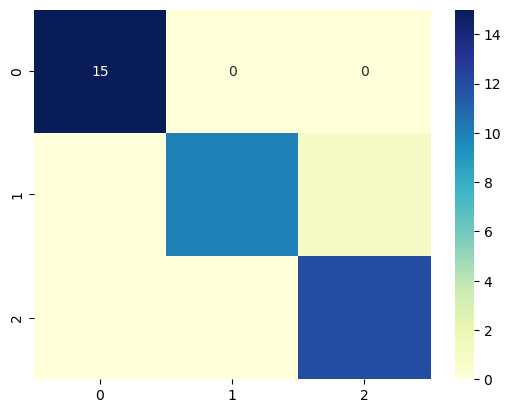

In [51]:
#Visualize the Confusion Matrix

cnf_matrix_1 = confusion_matrix(y_test,y_pred_1)

sns.heatmap(cnf_matrix_1,annot=True,cmap="YlGnBu")

In [52]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



**Visualize the Random Forest Tree**

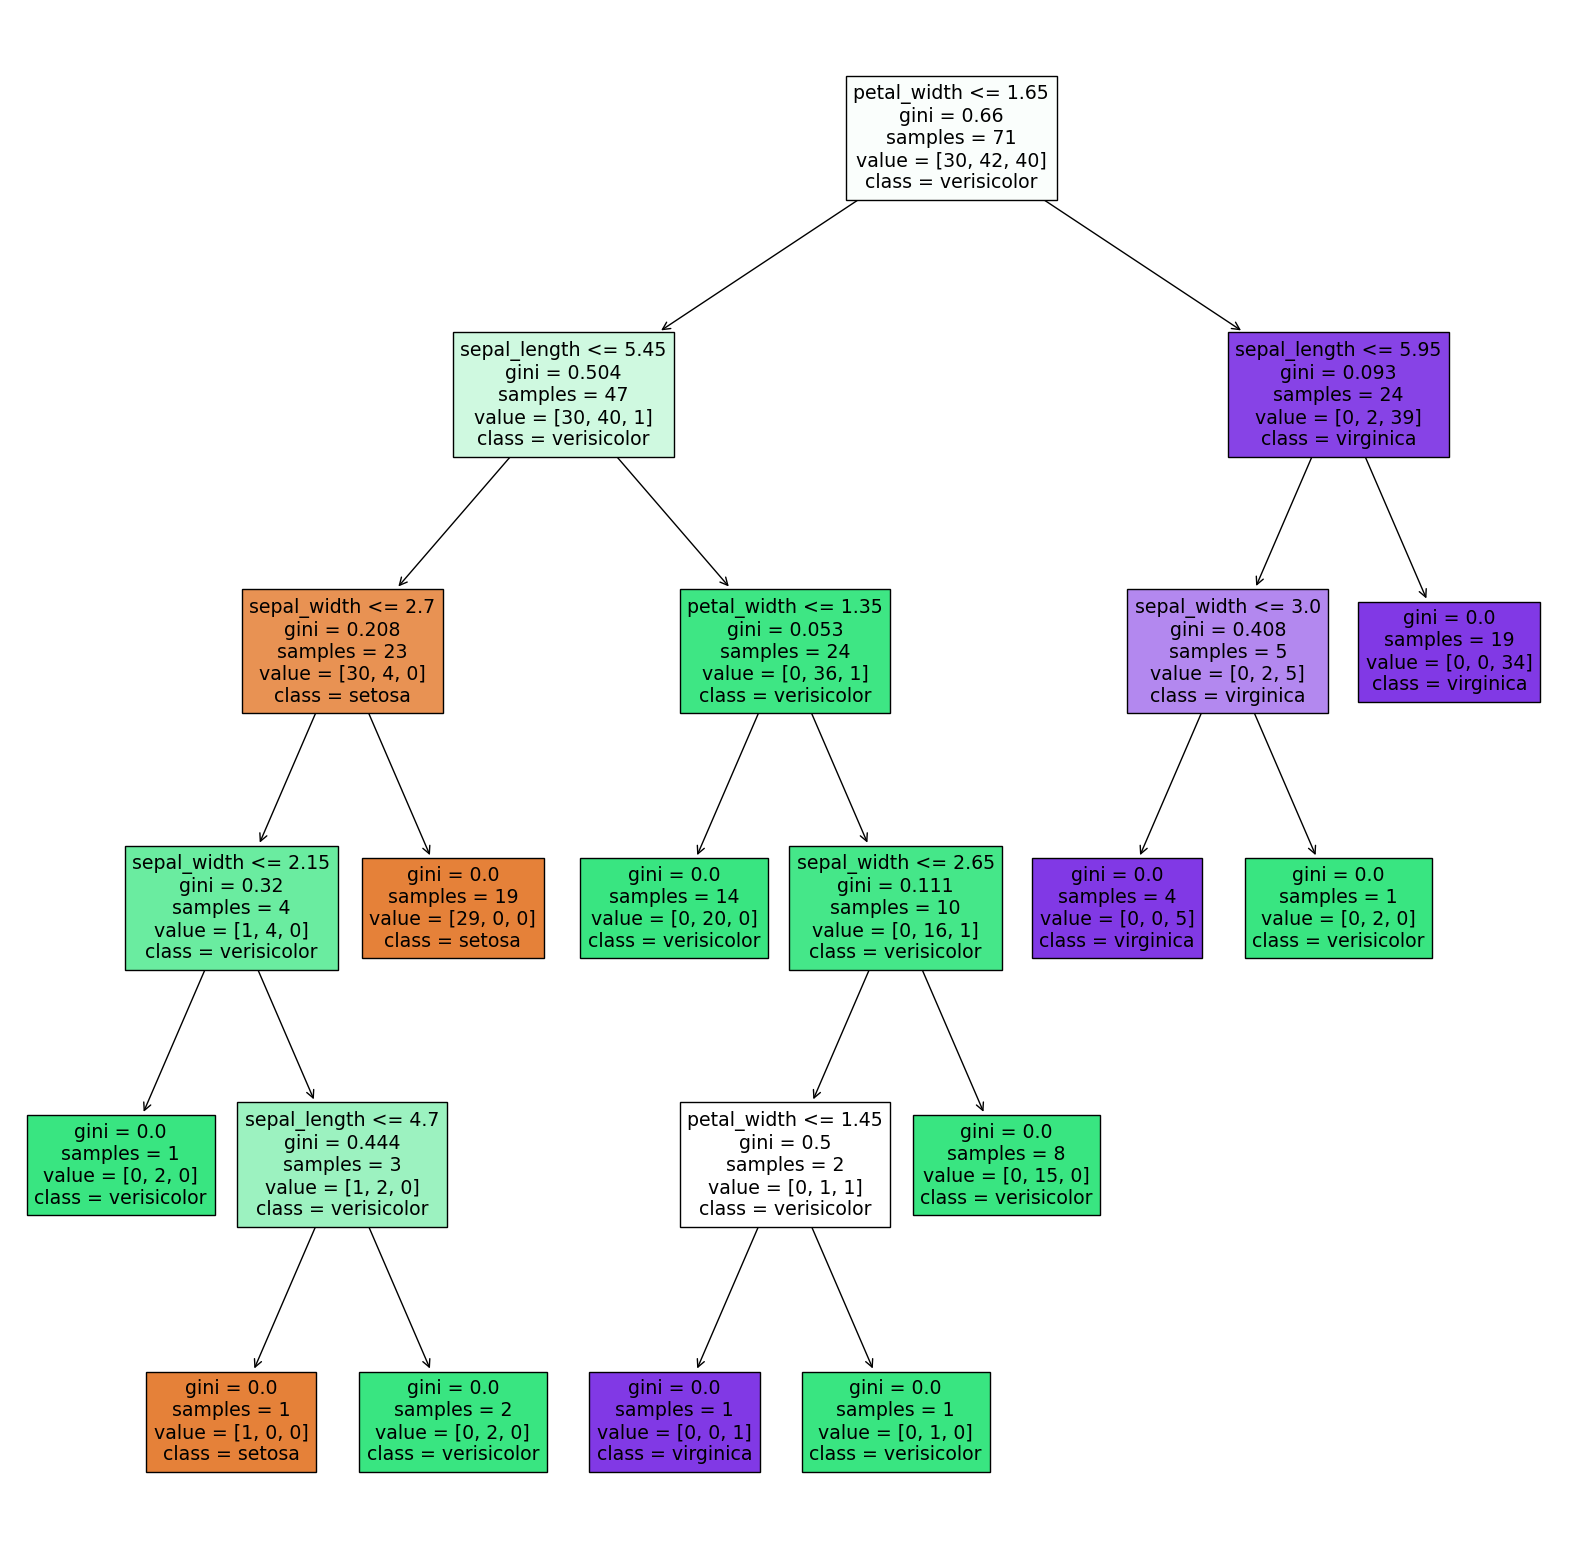

In [54]:
#Display 1 tree only
plt.figure(figsize=(20,20))

tree3 = tree.plot_tree(rf_model.estimators_[0],filled=True,feature_names=features,class_names=targets)

In [ ]:
rf_model.estimators_

# Hyperparameters Optimization 

In [56]:
#Create a new model

rf_model2 = RandomForestClassifier()

In [64]:
#Create Hyperparameter Dictionary
rf_params = {"n_estimators":[50,100,300],
             "max_depth":[3,5,7],
             "max_features":[2,4,6,8],
             "min_samples_split":[2,4,6]
}

**Define new Cross Validation Model**

In [65]:
rf_cv_model = GridSearchCV(estimator=rf_model2,param_grid=rf_params,cv=5,n_jobs= -1)

**Fit the X_train and y_train**

In [66]:
rf_cv_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'max_features': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [50, 100, 300]})

**Find the Best Parameters**

In [67]:
rf_cv_model.best_params_

{'max_depth': 3, 'max_features': 2, 'min_samples_split': 2, 'n_estimators': 50}

**Create a tunned model variable**

In [68]:
rf_tuned = RandomForestClassifier(max_depth=3,max_features=2,min_samples_split=2,n_estimators=50)

**Fit the X_train and y_train**

In [69]:
rf_tunned.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=2, n_estimators=50)

**Predict the X_test**

In [70]:
y_pred_rf = rf_tunned.predict(X_test)

# Evaluation Metrics

In [71]:
print("Accuracy Score", accuracy_score(y_test,y_pred_rf))

Accuracy Score 1.0


**Cross Validation**

In [73]:
cv_scores_rf = cross_val_score(estimator=rf_tunned,X=X_train,y=y_train,cv=10)

cv_scores_rf.mean()

0.9371212121212119

In [74]:
print(confusion_matrix(y_test,y_pred_rf))

[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


In [75]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



# Visualizing the Best Features of a Dataset

- Identify the best features using the .feature_importances

In [76]:
rf_tunned.feature_importances_

array([0.18458942, 0.01885589, 0.79655469])

In [77]:
X_train.columns 

Index(['sepal_length', 'sepal_width', 'petal_width'], dtype='object')

**Visualizing the features**

In [78]:
# Create pandas Series 
best_features = pd.Series(rf_tunned.feature_importances_,index=X_train.columns).sort_values(ascending=False)

best_features

petal_width     0.796555
sepal_length    0.184589
sepal_width     0.018856
dtype: float64

**Plot the data into a Bar Plot**

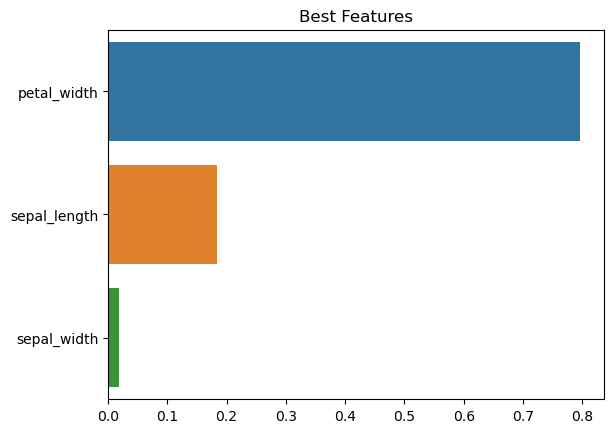

In [79]:
sns.barplot(x=best_features,y=best_features.index)
plt.title("Best Features")
plt.show()